In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

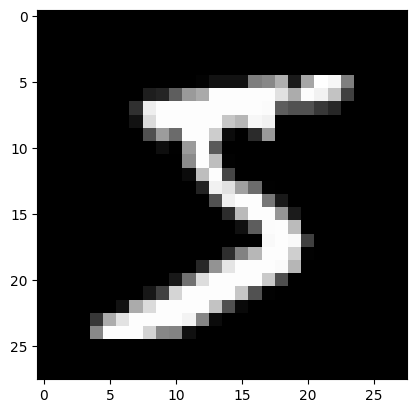

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

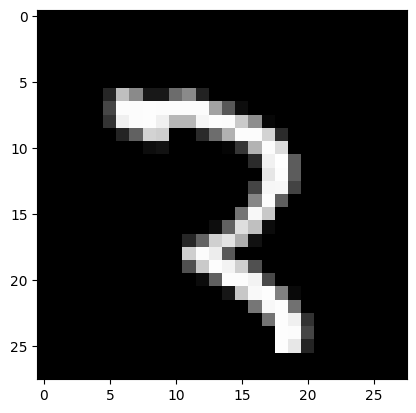

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())


In [ ]:
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.8472 - loss: 0.5166 - val_accuracy: 0.9727 - val_loss: 0.0886
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9733 - loss: 0.0886 - val_accuracy: 0.9791 - val_loss: 0.0658
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9828 - loss: 0.0567 - val_accuracy: 0.9796 - val_loss: 0.0601
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9827 - val_loss: 0.0519
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 38ms/step - accuracy: 0.9905 - loss: 0.0316 - val_accuracy: 0.9834 - val_loss: 0.0483


In [ ]:
metrics = pd.DataFrame(model.history.history)

print(' Dhiyaneshwar P - 212222110009')
metrics.head()


 Dhiyaneshwar P - 212222110009


,accuracy,loss,val_accuracy,val_loss
0,0.923967,0.255369,0.9727,0.088611
1,0.976083,0.079557,0.9791,0.065791
2,0.983350,0.054899,0.9796,0.060107
3,0.986750,0.042603,0.9827,0.051903
4,0.989533,0.033211,0.9834,0.048290


Dhiyaneshwar P - 212222110009
Dhiyaneshwar P - 212222110009


<Axes: >

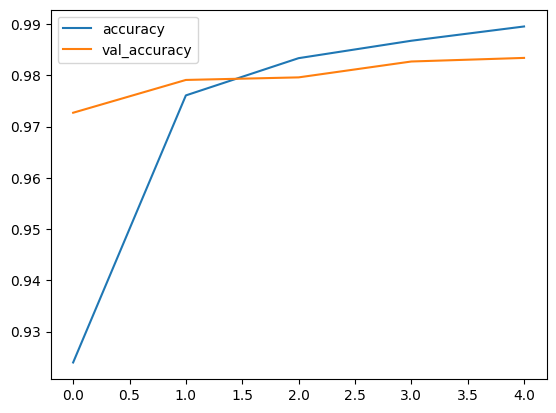

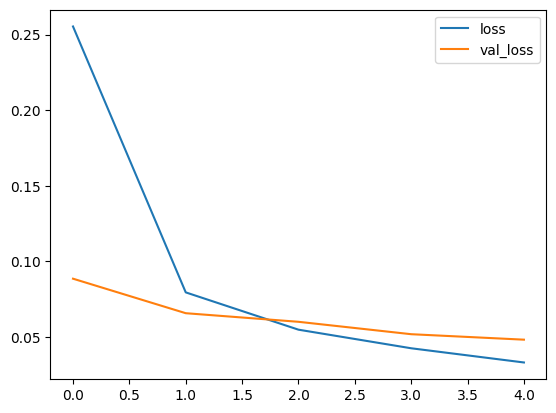

In [ ]:
print('Dhiyaneshwar P - 212222110009')
metrics[['accuracy','val_accuracy']].plot()

print('Dhiyaneshwar P - 212222110009')
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

print(confusion_matrix(y_test,x_test_predictions))

print(classification_report(y_test,x_test_predictions))

img = image.load_img('/content/image1.jpg')

type(img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[ 970    0    2    0    0    0    6    1    1    0]
 [   0 1127    0    1    0    0    5    0    2    0]
 [   1    3 1011    6    4    0    0    3    4    0]
 [   0    0    1  997    0    7    0    0    3    2]
 [   0    0    0    0  974    0    4    0    0    4]
 [   2    0    1    6    0  875    4    0    2    2]
 [   1    2    0    1    2    2  950    0    0    0]
 [   1    2   11    2    8    0    0  992    6    6]
 [   3    0    1    3    1    3    3    2  949    9]
 [   1    0    0    2   11    1    0    1    4  989]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98      

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
print(x_single_prediction)

[4]


Dhiyaneshwar P - 212222110009
[4]


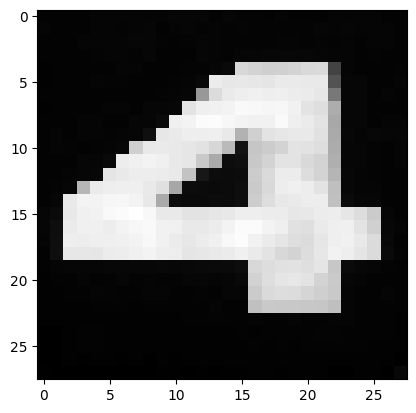

In [ ]:
print('Dhiyaneshwar P - 212222110009')
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print(x_single_prediction)

In [ ]:
img1 = image.load_img('/content/image2.jpg')

In [ ]:
img_tensor_1= tf.convert_to_tensor(np.asarray(img1))
img_28 = tf.image.resize(img_tensor_1,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction1 = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
print(x_single_prediction1)

[7]


Dhiyaneshwar P - 212222110009
[3]


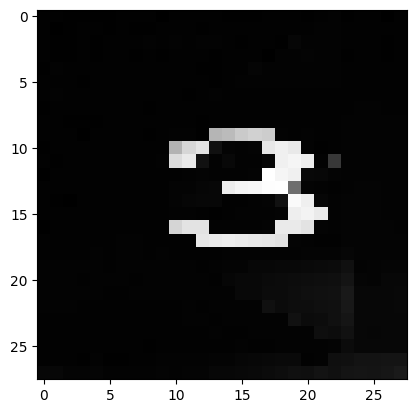

In [ ]:
print("Dhiyaneshwar P - 212222110009")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
print(x_single_prediction-1Z)